In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file=('heart_failure_clinical_records_dataset.csv')
df=pd.read_csv(file)
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

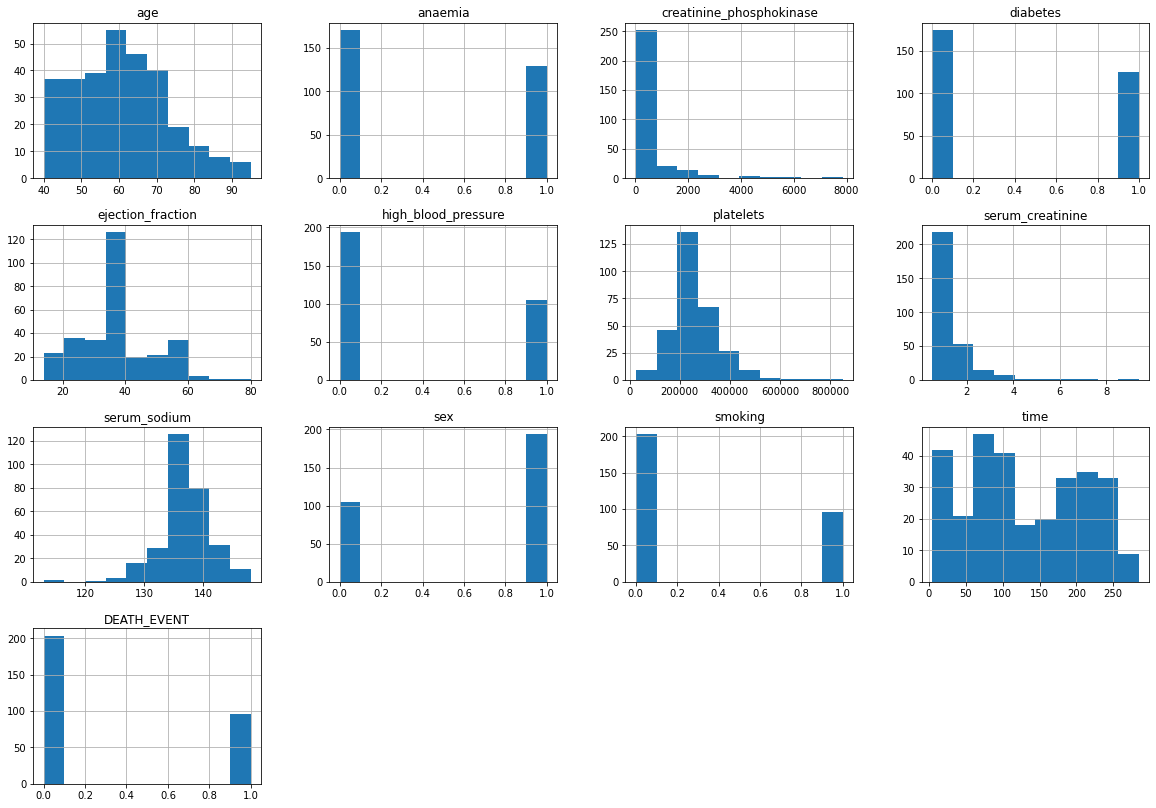

In [4]:
# Using Histogram
df.hist(figsize=(20,14))
plt.show()

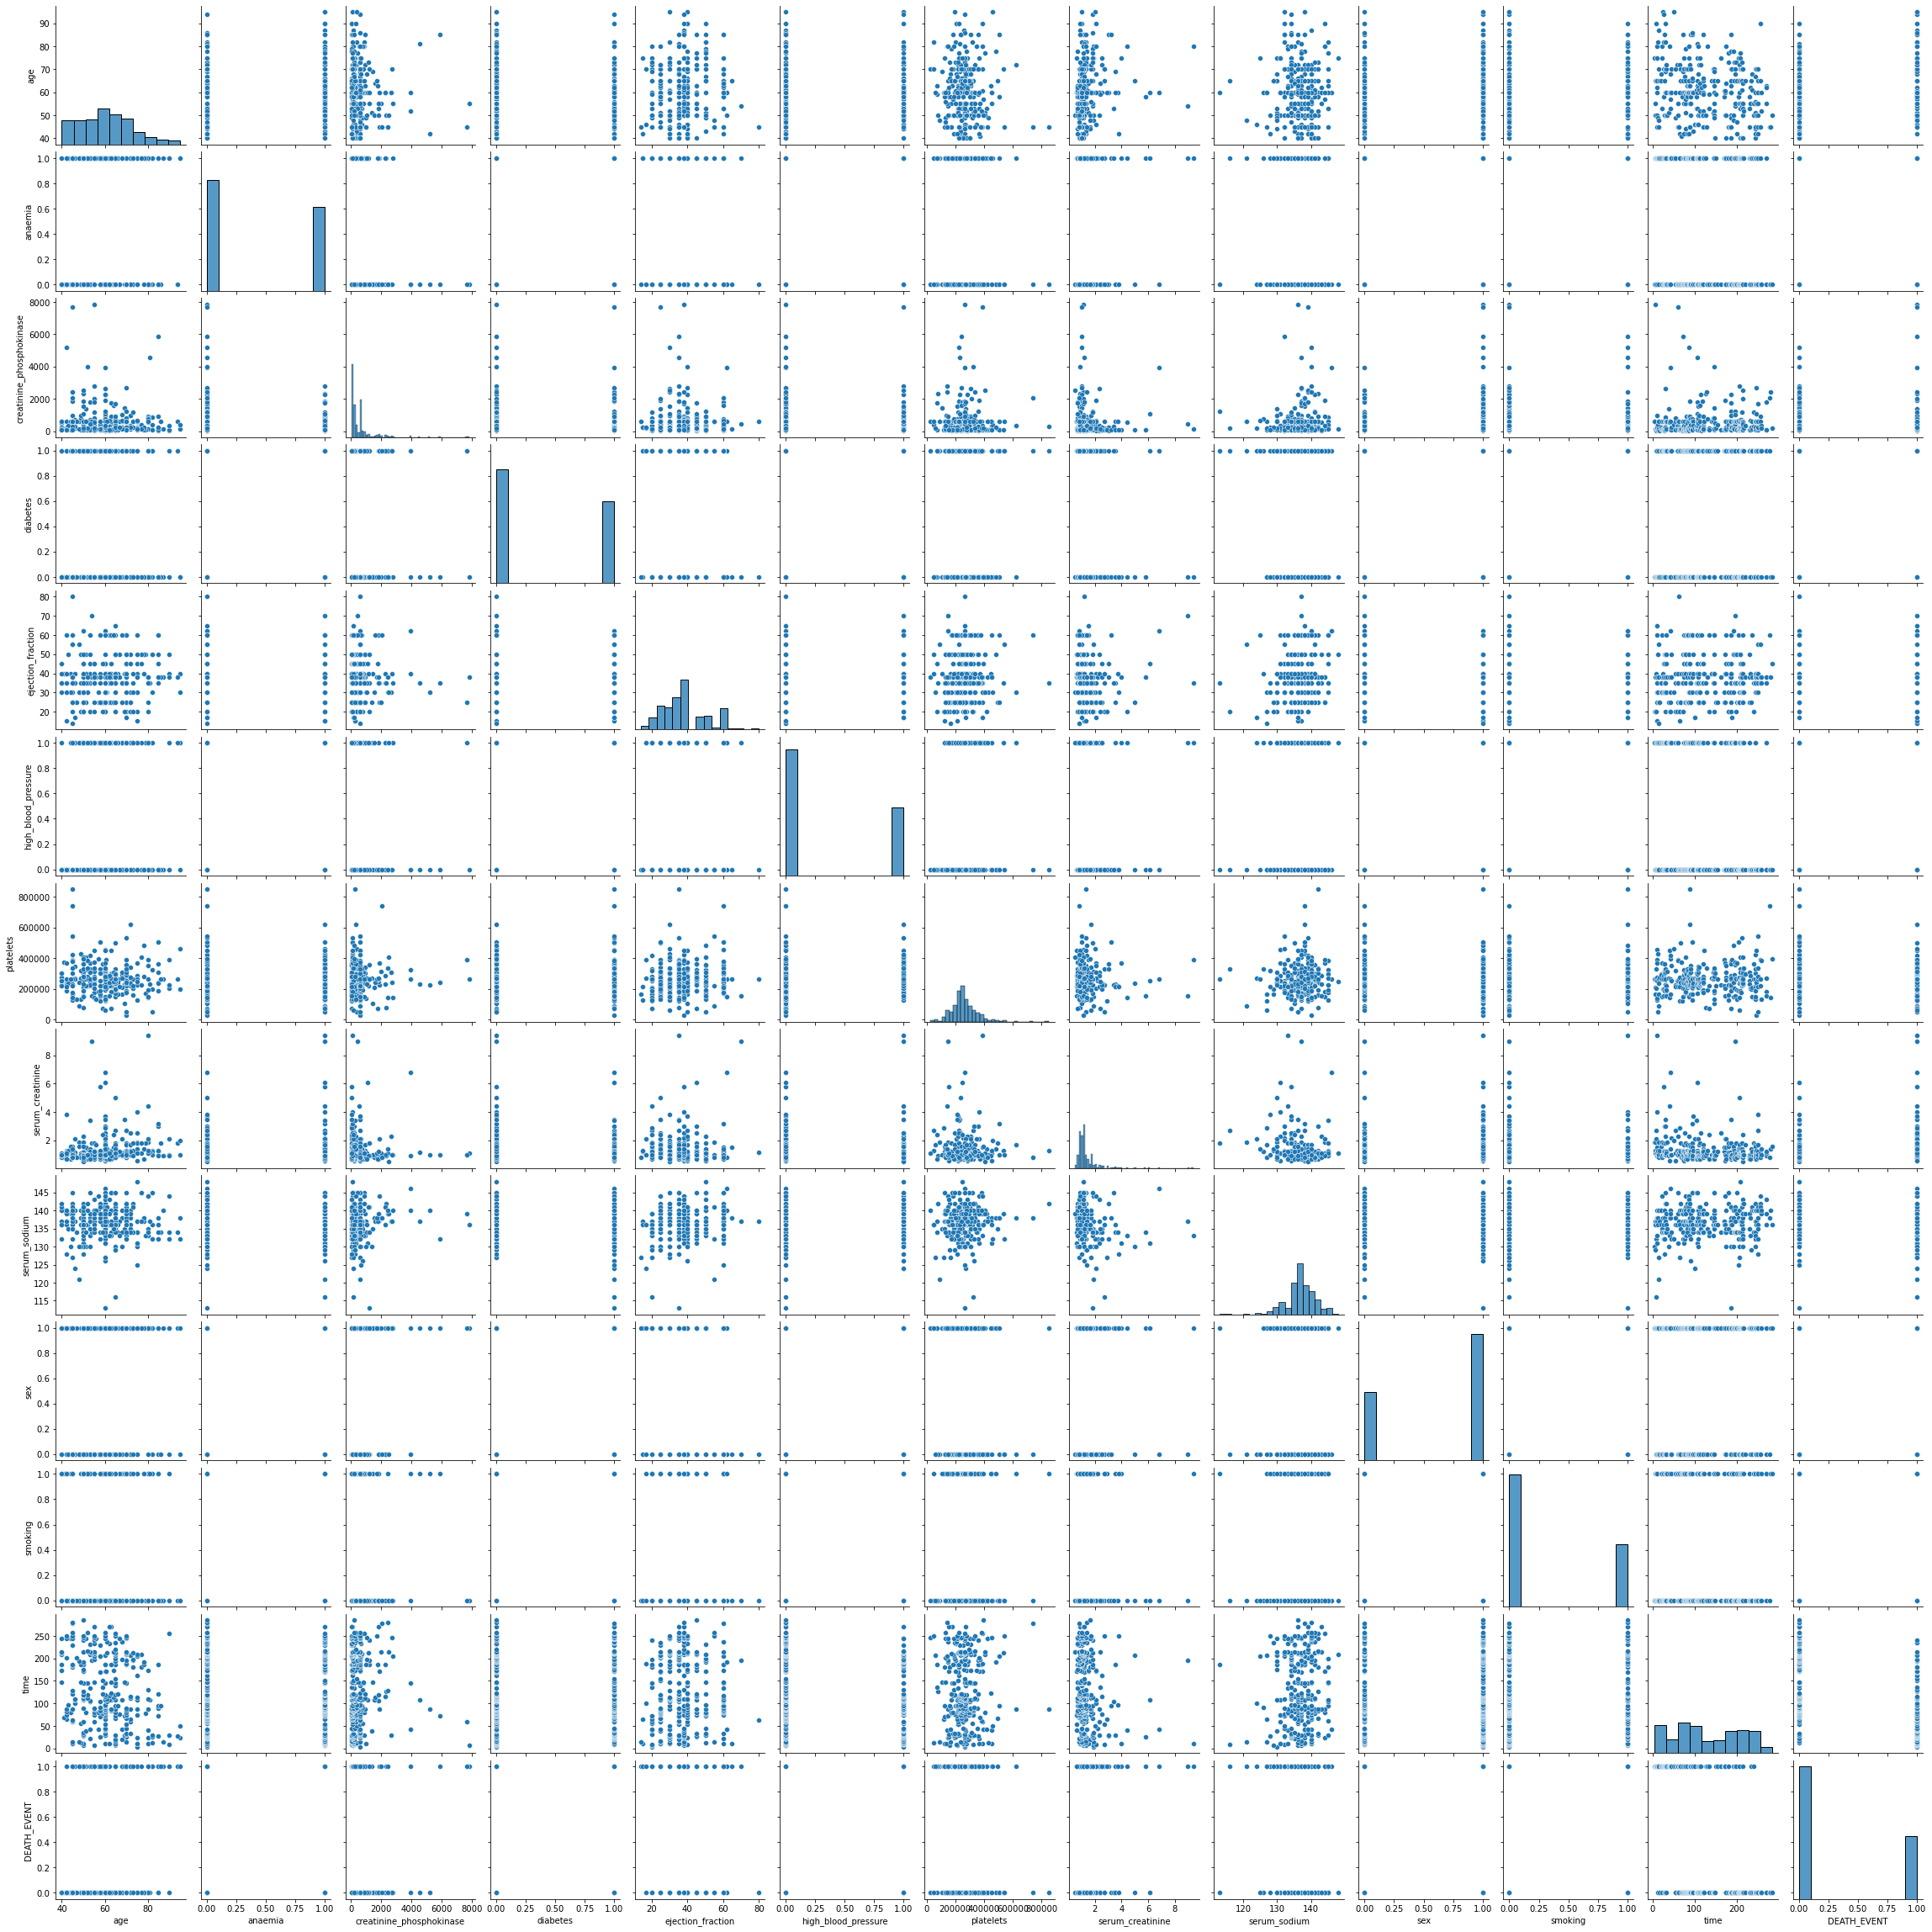

In [5]:
# Using Pairplots
sns.pairplot(data=df)

<AxesSubplot:>

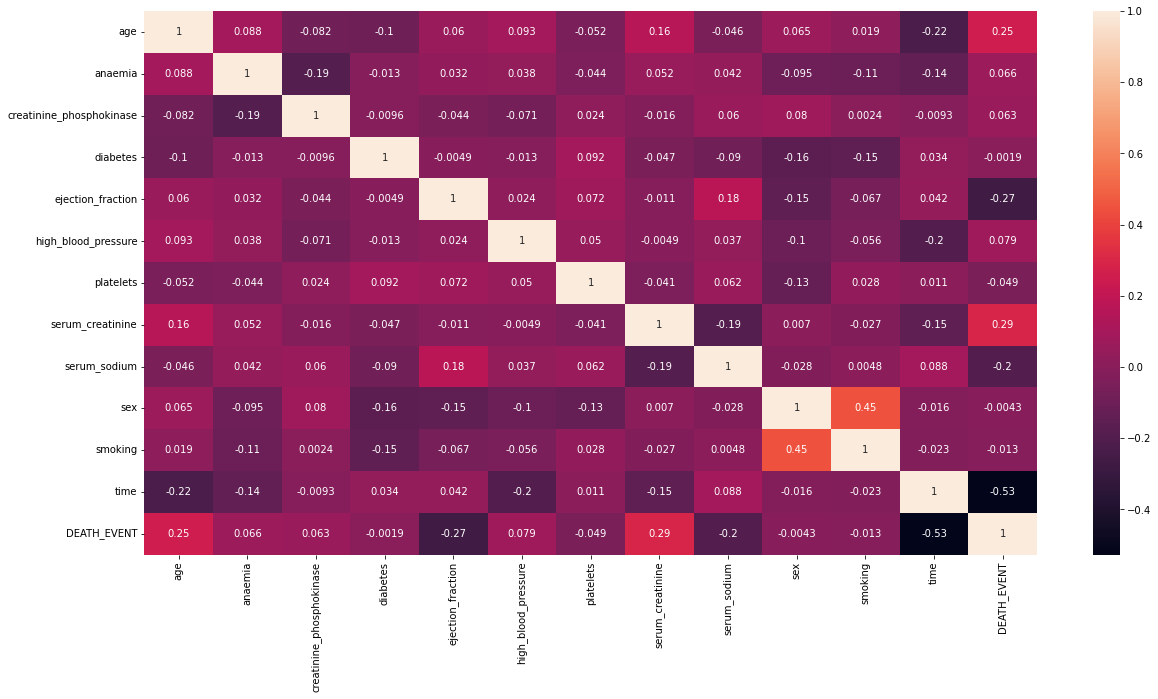

In [6]:
# Using Heatmaps
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [7]:
x_data=df.drop(axis='columns',columns={'DEATH_EVENT'})
y_data=df['DEATH_EVENT']
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)
x_train.shape,y_test.shape

((239, 12), (60,))

In [10]:
from sklearn.preprocessing import StandardScaler


sc=StandardScaler()
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
x_train[num_cols]=sc.fit_transform(x_train[num_cols])
x_test[num_cols]=sc.fit_transform(x_test[num_cols])

In [11]:
from sklearn.model_selection import cross_val_score


def get_crossval_score(model):
    accuracies=cross_val_score(estimator=model,
                    X=x_train,
                    y=y_train,
                    cv=10)
    print("Accuracy:{:.2f}%".format(accuracies.mean()*100))     
    print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

def get_confusion_accuracy(y_pred):
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    accuracy=accuracy_score(y_test,y_pred)
    print(accuracy)

# Train Models and Predicting Values

In [13]:
# Logistic Regression

logisticModel=LogisticRegression(random_state=1)
logisticModel.fit(x_train,y_train)
y_pred=logisticModel.predict(x_test)

get_confusion_accuracy(y_pred)
get_crossval_score(logisticModel)

[[32  6]
 [12 10]]
0.7
Accuracy:84.11%
Standard Deviation:9.45%


In [14]:
# K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier


kncModel=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
kncModel.fit(x_train,y_train)
y_pred=kncModel.predict(x_test)

get_confusion_accuracy(y_pred)
get_crossval_score(kncModel)

[[37  1]
 [17  5]]
0.7
Accuracy:77.84%
Standard Deviation:7.87%


In [15]:
# Kernel SVM

from sklearn.svm import SVC

kernalModel=SVC(kernel='rbf',random_state=42)
kernalModel.fit(x_train,y_train)
y_pred=kernalModel.predict(x_test)

get_confusion_accuracy(y_pred)
get_crossval_score(kernalModel)

[[32  6]
 [10 12]]
0.7333333333333333
Accuracy:82.03%
Standard Deviation:8.52%


In [16]:
# Naive Beyes

from sklearn.naive_bayes import GaussianNB

naiveModel=GaussianNB()
naiveModel.fit(x_train,y_train)
y_pred=naiveModel.predict(x_test)

get_confusion_accuracy(y_pred)
get_crossval_score(naiveModel)

[[33  5]
 [13  9]]
0.7
Accuracy:79.09%
Standard Deviation:6.93%


In [17]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier


decisionTreeModel=DecisionTreeClassifier(criterion='entropy',random_state=42)
decisionTreeModel.fit(x_train,y_train)
y_pred=decisionTreeModel.predict(x_test)

get_confusion_accuracy(y_pred)
get_crossval_score(decisionTreeModel)

[[33  5]
 [15  7]]
0.6666666666666666
Accuracy:77.46%
Standard Deviation:8.31%


In [18]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier


randomForestModel=RandomForestClassifier(random_state=42)
randomForestModel.fit(x_train,y_train)
y_pred=randomForestModel.predict(x_test)

get_confusion_accuracy(y_pred)
get_crossval_score(randomForestModel)

[[38  0]
 [ 6 16]]
0.9
Accuracy:83.70%
Standard Deviation:6.28%


In [19]:
#XG Boost
from xgboost import XGBClassifier

xgModel=XGBClassifier()
xgModel.fit(x_train,y_train)
y_pred=xgModel.predict(x_test)

get_confusion_accuracy(y_pred)
get_crossval_score(xgModel)


[[37  1]
 [11 11]]
0.8
Accuracy:82.45%
Standard Deviation:6.36%
